In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import make_scorer,classification_report, matthews_corrcoef,accuracy_score, average_precision_score, roc_auc_score,roc_curve,precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature



In [35]:
def ANN():
    df_train = pd.read_csv('../Data/train.csv')
    df_test = pd.read_csv('../Data/validation.csv')
    
    df_test_under = pd.read_csv('../Data/validation_under.csv')
    
    # preprocessing data    
    df_train_data = df_train.drop(columns = ['Amount','Class'])
    df_train_result = df_train['Class']
    df_train_result = to_categorical(df_train_result)
    
    df_test_data = df_test.drop(columns = ['Amount','Class'])
    df_test_result = df_test['Class']
    
    df_test_under_data = df_test_under.drop(columns = ['Amount','Class'])
    df_test_under_result = df_test_under['Class']


    df_test_result = to_categorical(df_test_result)
    #create ANN model
    model = Sequential([
        Dense(64, kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_shape=(16,),activation = 'relu'),
        Dropout(0.4),
        Dense(64,  kernel_initializer='glorot_normal',
                bias_initializer='zeros', activation='relu'),
        Dropout(0.4),
        Dense(64,  kernel_initializer='glorot_normal',
                bias_initializer='zeros',activation='relu'),
        Dropout(0.4),
        Dense(64,  kernel_initializer='glorot_normal',
                bias_initializer='zeros',activation='relu'),
        Dropout(0.4),
        Dense(2,activation='softmax')
        ])
    
    model.compile(
        optimizer='adam',
        loss= 'binary_crossentropy',
        metrics=['accuracy']
        )
    epoch = 500   # should be 450 - 500
    batch_size = 2048
    model.fit(df_train_data,df_train_result,epochs = epoch, batch_size = batch_size)
    
    #prediction
    df_test_pred = model.predict(df_test_data)
    pred = np.argmax(df_test_pred, axis=1).tolist()
    print('CLASSIFICATION REPORT')
    df_test_report = df_test['Class'].tolist()
    print(classification_report(df_test_report, pred,output_dict =True))
    
    #undersample prediction
    df_test_under_pred = model.predict(df_test_under_data)
    pred_under = np.argmax(df_test_under_pred, axis=1).tolist()
    print('CLASSIFICATION REPORT')
    df_test_under_report = df_test_under['Class'].tolist()
    print(classification_report(df_test_under_report, pred_under,output_dict =True))
    fpr, tpr, thresholds = roc_curve(df_test_under_report, pred_under, pos_label=1)
    
    #roc curve
    auc = roc_auc_score(df_test_under_report, pred_under)
    print('roc_auc_score')
    print(auc)
    plt.plot(fpr, tpr, color='darkorange')
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    #pr curve
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    precision, recall, _ = precision_recall_curve(df_test_under_report, pred_under)
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve')

Train on 185123 samples
Epoch 1/10
185123/185123 [==============================] - 3s 17us/sample - loss: 0.1480 - accuracy: 0.9391
Epoch 2/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0186 - accuracy: 0.9983
Epoch 3/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0090 - accuracy: 0.9983
Epoch 4/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0073 - accuracy: 0.9983
Epoch 5/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0062 - accuracy: 0.9983
Epoch 6/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0054 - accuracy: 0.9983
Epoch 7/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0049 - accuracy: 0.9983
Epoch 8/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0049 - accuracy: 0.9983
Epoch 9/10
185123/185123 [==============================] - 2s 11us/sample - loss: 0.0047 - accuracy: 0.

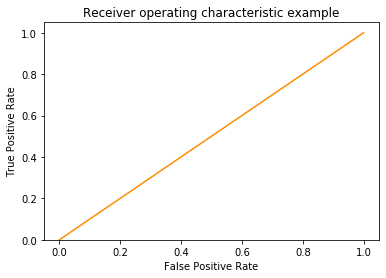

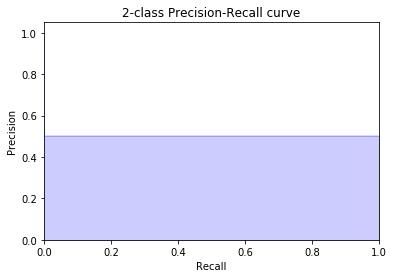

In [36]:
ANN()